KNN - predict diabetics

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#testing accurecy algo
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Classified Data',index_col=0)

In [4]:
scaler=StandardScaler()

In [5]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaled_feature=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [7]:
scaled_feature[0]

array([-0.12354188,  0.18590747, -0.91343069,  0.31962911, -1.03363681,
       -2.3083747 , -0.79895135, -1.48236813, -0.9497194 , -0.64331425])

In [8]:
df_feat=pd.DataFrame(scaled_feature,columns=df.columns[:-1])

In [9]:
X=df_feat
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
pred=knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

In [25]:
print(confusion_matrix(pred,y_test))

[[151  15]
 [  8 126]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [27]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

Text(0, 0.5, 'Error Rate')

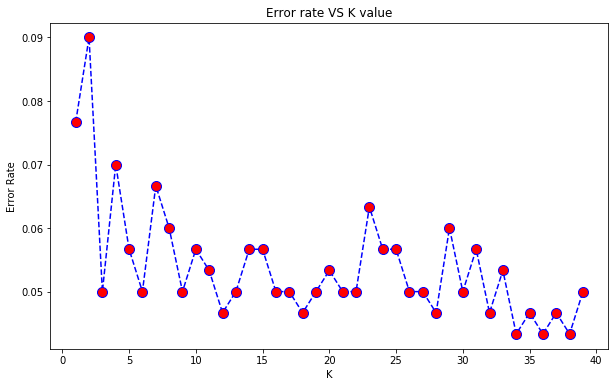

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate VS K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[153   6]
 [  9 132]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [37]:
accuracy_score(y_test,pred)

0.95

In [38]:
X_test

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
545,-0.621855,0.607634,1.095271,0.132272,-0.749523,1.370756,1.115346,1.582741,-0.671901,0.974873
298,-0.422925,0.238950,-0.186787,-0.868066,0.811686,-0.194670,-1.240036,1.301344,0.323375,0.243410
109,-1.995862,-0.033739,0.960636,0.407734,0.903405,0.115802,2.151185,-0.284140,0.711896,-0.484173
837,0.153684,0.488562,0.263569,1.925549,-2.103693,1.035925,-0.298311,0.080358,-0.435076,2.089744
194,-0.583369,1.353685,0.339628,0.785814,1.251868,1.288952,-0.073212,1.185814,-0.737898,1.114822
...,...,...,...,...,...,...,...,...,...,...
847,-1.363614,1.283973,-0.961433,1.380086,-0.820755,0.984997,-1.553568,0.228551,-0.310256,-3.533290
682,0.465831,-1.249550,-0.640057,1.642450,-0.425716,-1.982328,-0.262963,-0.637191,1.810998,-1.758326
884,0.820292,-1.585249,-1.801867,-0.568317,-0.619265,0.683681,-0.074401,-0.899029,0.678849,-1.383449
325,1.101148,-2.247592,-1.092269,-0.264929,0.729435,0.526578,-0.696684,-0.977593,0.703979,-0.556975


ValueError: Expected 2D array, got 1D array instead:
array=[-0.62185545  0.60763365  1.09527083  0.13227223 -0.74952263  1.37075596
  1.11534582  1.58274119 -0.6719008   0.97487268].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.